<h2>Initialize part</h2>

In [128]:
import seaborn 
#try this three
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv('data/[1h]BTCUSDT.csv')
df2 = pd.read_csv('data/[1h]BTCUSDT.csv')
print(df)

               Start           Stop      Open     Close       Low      High  \
0      1502942400000  1502945999999   4261.48   4308.83   4261.32   4313.62   
1      1502946000000  1502949599999   4308.83   4315.32   4291.37   4328.69   
2      1502949600000  1502953199999   4330.29   4324.35   4309.37   4345.45   
3      1502953200000  1502956799999   4316.62   4349.99   4287.41   4349.99   
4      1502956800000  1502960399999   4333.32   4360.69   4333.32   4377.85   
...              ...            ...       ...       ...       ...       ...   
29471  1609444800000  1609448399999  28897.84  29126.70  28862.00  29139.65   
29472  1609448400000  1609451999999  29126.71  28966.36  28900.79  29169.55   
29473  1609452000000  1609455599999  28966.36  29100.84  28910.19  29143.73   
29474  1609455600000  1609459199999  29100.83  28923.63  28780.00  29110.35   
29475  1609459200000  1609462799999  28923.63  28995.13  28690.17  29031.34   

            Volume  
0        47.181009  
1        

In [130]:
index = [x for x in range(0, len(df["Open"]))]

In [136]:
number_of_predictions = 30
new_index = [(index[-1] + x) for x in range(number_of_predictions)]

In [132]:
data = df["Close"]

<h2>Part with ploting data</h2>

[]

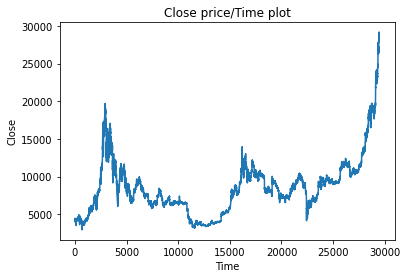

In [54]:
fig, ax = plt.subplots()
ax.plot(index, df["Close"])
ax.set(xlabel='Time', ylabel='Close',
       title='Close price/Time plot')
plt.plot()

[]

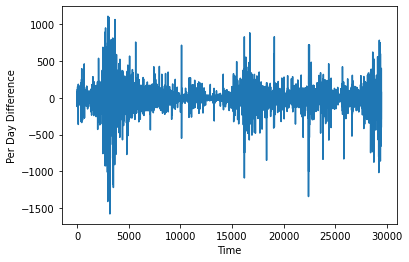

In [48]:
delta_day = []
for i in range(len(df["Open"])):
    delta_day.append(df["Close"][i] - df["Open"][i])
fig, ax = plt.subplots()
ax.plot(index, delta_day)
ax.set(xlabel='Time', ylabel='Per Day Difference')
plt.plot()

<h2>Models for training</h2>

<h3 style="text-align:center">AutoReg</h3>

In [133]:
from statsmodels.tsa.ar_model import AutoReg

In [69]:
model = AutoReg(data, lags=number_of_predictions)
model_fit = model.fit()
# make prediction
autoreg_prediction = model_fit.predict(len(data), len(data)+number_of_predictions-1) 

e:\python\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


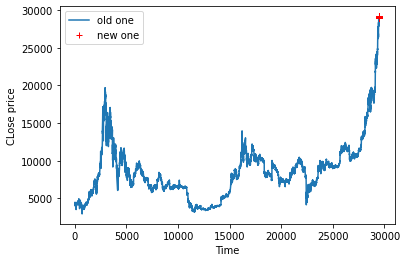

In [72]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,autoreg_prediction,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

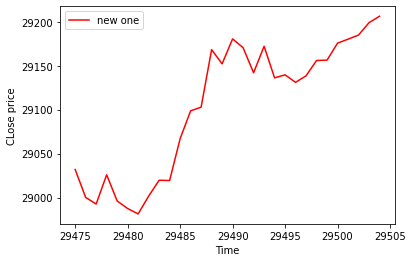

In [75]:
fig, ax = plt.subplots()
line2, = ax.plot(new_index,autoreg_prediction,'r',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">ARIMA</h3>

In [134]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
model = ARIMA(data, order=(number_of_predictions, 1, 1))
model_fit = model.fit()
arima = []
# make prediction
for i in range(number_of_predictions):
    arima_prediction = model_fit.predict(len(data)+i, len(data)+i)
    arima.append(arima_prediction)

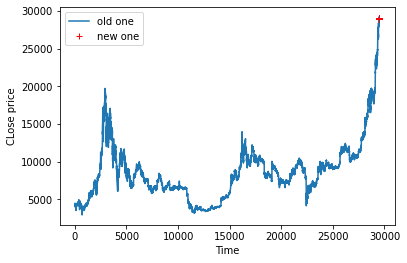

In [80]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,arima,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

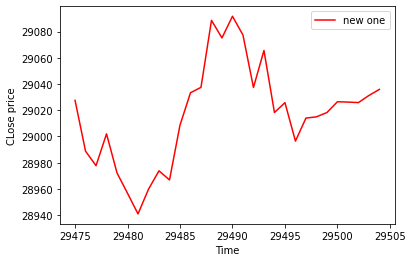

In [81]:
fig, ax = plt.subplots()
line2, = ax.plot(new_index,arima,'r',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

In [96]:
model = ARIMA(data, order=(number_of_predictions, 2, 2))
model_fit = model.fit()
# make prediction
arima2 = []
for i in range(number_of_predictions):
    arima2.append(model_fit.predict(len(data)+i, len(data)+i))

In [141]:
model = ARIMA(data, order=([x for x in range(1,number_of_predictions)], 2, [y for y in range(1,number_of_predictions)]))
model_fit = model.fit()
# make prediction[x for x in range(number_of_predictions)]
arima_L = []
for i in range(number_of_predictions):
    arima_L.append(model_fit.predict(len(data)+i, len(data)+i))

e:\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


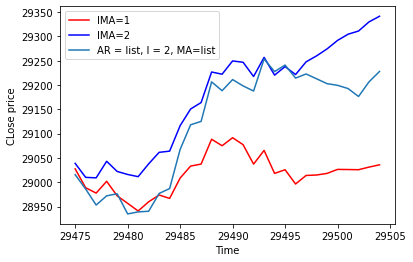

In [144]:
fig, ax = plt.subplots()
line1, = ax.plot(new_index,arima,'r',label="IMA=1")
line2, = ax.plot(new_index,arima2,'b',label="IMA=2")
line3, = ax.plot(new_index,arima_L,label="AR = list, I = 2, MA=list")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">SimpleExpSmoothing</h3>

In [145]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [163]:
model = SimpleExpSmoothing(data,initialization_method='heuristic')
model_fit = model.fit(smoothing_level=0.7,optimized=True,use_brute=True,method="bh")
#smoothing_level = max 2 working - futher will be nan; use_brute - for start vallues
#Method "bh" in doc listed as quickest
simpexp = model_fit.predict(number_of_predictions)

In [172]:
Simp_exp = []
data1 = data
for i in range(number_of_predictions):
    model = SimpleExpSmoothing(data1,initialization_method='heuristic')
    model_fit = model.fit(smoothing_level=0.7,optimized=True,use_brute=True,method="bh")
    fit1 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
    simpexp = fit1.forecast(1)
    data1.append(simpexp)
    Simp_exp.append(simpexp)

In [165]:
fit3 = SimpleExpSmoothing(data, initialization_method="estimated").fit()
fcast1 = fit3.forecast(number_of_predictions)
fit1 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
simpexp = fit1.forecast(number_of_predictions)

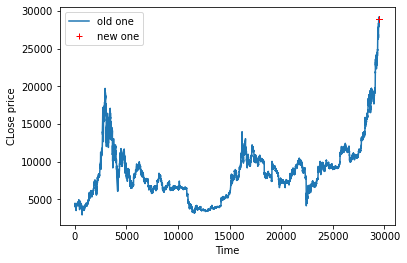

In [161]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,simpexp,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

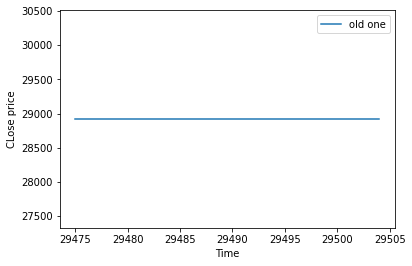

In [174]:
fig, ax = plt.subplots()
line1, = ax.plot(new_index, Simp_exp,label="old one")
#line2, = ax.plot(new_index,simpexp,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">ExponentialSmoothing</h3>

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [100]:
model = ExponentialSmoothing(data)
model_fit = model.fit(smoothing_level=0.2)

# make prediction

29476    28919.135718
dtype: float64
29477    28919.135718
dtype: float64
29478    28919.135718
dtype: float64
29479    28919.135718
dtype: float64
29480    28919.135718
dtype: float64
29481    28919.135718
dtype: float64
29482    28919.135718
dtype: float64
29483    28919.135718
dtype: float64
29484    28919.135718
dtype: float64
29485    28919.135718
dtype: float64
29486    28919.135718
dtype: float64
29487    28919.135718
dtype: float64
29488    28919.135718
dtype: float64
29489    28919.135718
dtype: float64
29490    28919.135718
dtype: float64
29491    28919.135718
dtype: float64
29492    28919.135718
dtype: float64
29493    28919.135718
dtype: float64
29494    28919.135718
dtype: float64
29495    28919.135718
dtype: float64
29496    28919.135718
dtype: float64
29497    28919.135718
dtype: float64
29498    28919.135718
dtype: float64
29499    28919.135718
dtype: float64
29500    28919.135718
dtype: float64
29501    28919.135718
dtype: float64
29502    28919.135718
dtype: float64
2

In [177]:
data2 = data
win_exp = []
for i in range(number_of_predictions):
    model = ExponentialSmoothing(data2,initialization_method='heuristic')
    model_fit = model.fit(smoothing_level=0.7,optimized=True,use_brute=True,method="bh")
    fit1 = ExponentialSmoothing(data2, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
    exp = fit1.forecast(1)
    data2.append(exp)
    win_exp.append(exp)

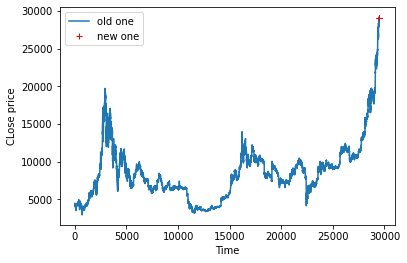

In [64]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,win_exp,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

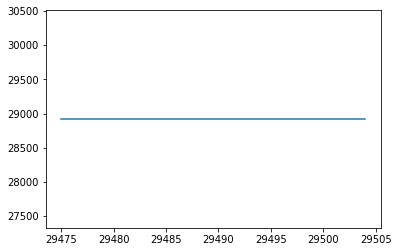

In [168]:
fig,ax = plt.subplots()
line, = ax.plot(new_index,win_exp)
plt.show()

<h3 style="text-align:center">SARIMA</h3>

In [180]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [181]:
# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
# define model
model = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
SARIMA = model_fit.forecast(start=len(data), end=len(data)+number_of_predictions)

TypeError: predict() got multiple values for keyword argument 'start'

In [ ]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,SARIMA,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

In [ ]:
fig,ax = plt.subplots()
line, = ax.plot(new_index,SARIMA)
plt.show()

<h3 style="text-align:center">Results</h3>

In [ ]:
fig, ax = plt.subplots()
line1, = ax.plot(new_index,autoreg_prediction,'b',label="AR")
line2, = ax.plot(new_index,arima_L,'r',label="ARIMA")
line3, = ax.plot(new_index,Simp_exp,'p',label="SES")
line4, = ax.plot(new_index,win_exp,'y',label="HWES")
line5, = ax.plot(new_index,SARIMA,label="SARIMA")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()